In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
d0=pd.read_csv('./mnist_train.csv');
print(d0.head(5));

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [27]:
l=d0["label"];
d=d0.drop("label",axis=1);
print(d.shape)
print(l.shape)

(60000, 784)
(60000,)


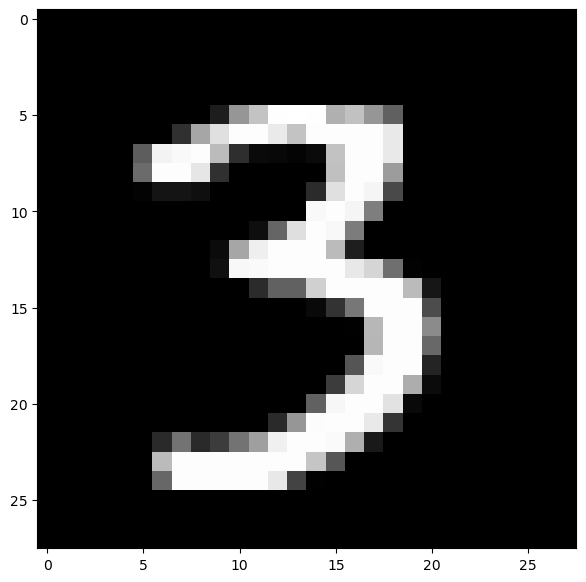

3


In [28]:
#display a number or Figure
plt.figure(figsize=(7,7))
idx=10000
grid_data=d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show();
print(l[idx]);


In [29]:
# 2D visualisation using pca
labels=l.head(15000);
data=d.head(15000);
print("The shape of the sample data and labels are ", data.shape,labels.shape);

The shape of the sample data and labels are  (15000, 784) (15000,)


In [30]:
# Data Preprocessing
import sklearn

std_data = sklearn.preprocessing.StandardScaler().fit_transform(data);
print(std_data.shape);

(15000, 784)


In [31]:
#Find the co-variance matrix
sample_data=std_data;
cov_mat=np.matmul(sample_data.T,sample_data);
print(cov_mat.shape);

(784, 784)


In [32]:
# Finding eigenvalues and eigenvector
from scipy.linalg import eigh;
values,vectors=eigh(cov_mat,eigvals=(782,783));
print("Shape of eigen vectors", vectors.shape);

Shape of eigen vectors (784, 2)


In [33]:
vectors=vectors.T;
print("Updated shape of eigen vectors", vectors.shape);

Updated shape of eigen vectors (2, 784)


In [34]:
#Projecting the original data sample on the 2-plane
import matplotlib.pyplot as plt
new_coordinates=np.matmul(vectors, sample_data.T)
print("Shape of new projected points ",new_coordinates.shape);


Shape of new projected points  (2, 15000)


In [35]:
# Ploting and visualizing data using reduced 2-Dim data.
new_coordinates=np.vstack((new_coordinates, labels)).T
print(new_coordinates.shape);




(15000, 3)


In [36]:
data_frame=pd.DataFrame(data=new_coordinates, columns=("1st_Principal","2nd_Principal","Label"));
print(data_frame.head());

   1st_Principal  2nd_Principal  Label
0      -4.457050       0.960769    5.0
1      -7.397795      -8.658155    0.0
2       9.640690      -2.082854    4.0
3      -3.356074       7.187465    1.0
4       2.979880       4.933889    9.0


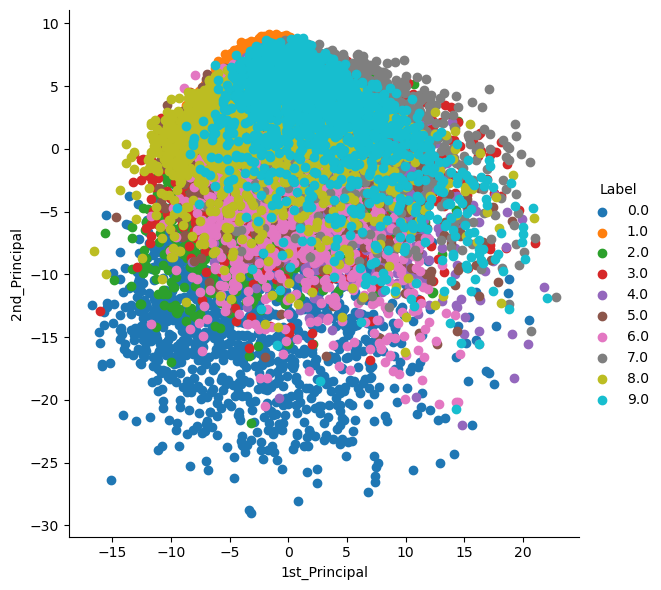

In [37]:
import seaborn as sn;
sn.FacetGrid(data_frame,hue='Label',height=6).map(plt.scatter,"1st_Principal","2nd_Principal").add_legend();
plt.show();

In [38]:
## We can now easily classify the different datapoints using this plot.

In [39]:
#PCA using scikit learn


In [40]:
#Initializing pca
from sklearn import decomposition;
pca=decomposition.PCA();
pca.n_components=2;

In [41]:
pca_data=pca.fit_transform(sample_data);## sample data is already stdize
print(pca_data.shape);


(15000, 2)


In [42]:
pca_data=np.vstack((pca_data.T,labels)).T
print(pca_data.shape);

(15000, 3)


In [43]:
pca_df=pd.DataFrame(data=pca_data, columns=("1st_Principal","2nd_Principal","Label"));

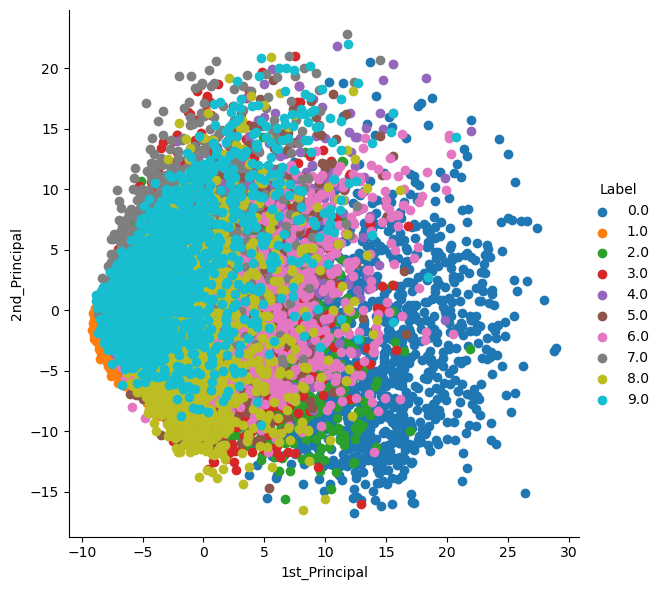

In [44]:
sn.FacetGrid(pca_df,hue='Label',height=6).map(plt.scatter,"1st_Principal","2nd_Principal").add_legend();
plt.show();

In [ ]:
##This is again same plot, which is produced by simple lines of code using sklearn.

In [45]:
#PCA for dimentionality reduction 
pca.n_components=784;
pca_data=pca.fit_transform(sample_data);


In [46]:
pecentage_varianc_explained=pca.explained_variance_/np.sum(pca.explained_variance_);

In [47]:
cum_var_explained=np.cumsum(pecentage_varianc_explained);

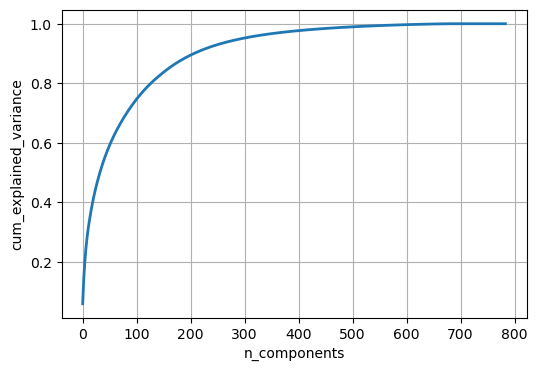

In [48]:
plt.figure(1,figsize=(6,4));
plt.clf();
plt.plot(cum_var_explained,linewidth=2);
plt.axis('tight');
plt.grid();
plt.xlabel("n_components");
plt.ylabel("cum_explained_variance");
plt.show();

In [ ]:
#To retain the 90 percent of the variance we have to take first 200 important features/directions/vectors.